<a href="https://colab.research.google.com/github/boyercb/bst263-final-project/blob/master/BST_263_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, l1_min_c
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [0]:
# currently the coding is 
# run cleaning code
# url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/mydata_unique.csv'
# url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/mydata_all.csv'

# Please use my url here since Chloe and I might keep updating and adding new dataset to here. 
url= 'https://raw.githubusercontent.com/lcareflektor/bst263finalProject/master/mydata_all.csv'
mydata = pd.read_csv(url)

In [0]:
mydata.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,patient_id,age,gender,label
0,0.047998,0.057597,0.076796,0.076796,0.047998,0.047998,0.038398,0.057597,0.105595,0.047998,0.057597,0.057597,0.038398,0.076796,0.067197,0.038398,0.076796,0.019199,0.038398,0.057597,0.057597,0.095995,0.047998,0.067197,0.028799,0.038398,0.047998,0.105595,0.124794,0.047998,0.038398,0.047998,0.105595,0.047998,0.028799,0.028799,0.047998,0.105595,0.095995,0.067197,...,0.115194,0.057597,0.057597,0.047998,0.115194,0.057597,0.076796,0.038398,0.057597,0.076796,0.086396,0.086396,0.047998,0.047998,0.086396,0.057597,0.076796,0.009600,0.038398,0.115194,0.067197,0.019199,0.086396,0.067197,0.076796,0.086396,0.086396,0.057597,0.057597,0.076796,0.086396,0.115194,0.057597,0.067197,0.086396,0.057597,1,41,M,1
1,0.067197,0.067197,0.124794,0.143993,0.105595,0.047998,0.038398,0.038398,0.047998,0.038398,0.047998,0.038398,0.057597,0.009600,0.028799,0.038398,0.134393,0.000000,0.095995,0.028799,0.220789,0.009600,0.000000,0.067197,0.000000,0.028799,0.153592,0.000000,0.105595,0.086396,0.000000,0.009600,0.105595,0.000000,0.105595,0.009600,0.316784,0.067197,0.009600,0.095995,...,0.000000,0.028799,0.019199,0.038398,0.047998,0.143993,0.172791,0.057597,0.067197,0.047998,0.057597,0.047998,0.038398,0.095995,0.095995,0.057597,0.067197,0.019199,0.028799,0.028799,0.105595,0.095995,0.220789,0.076796,0.249588,0.028799,0.028799,0.076796,0.019199,0.000000,0.038398,0.009600,0.076796,0.047998,0.038398,0.038398,1,41,M,1
2,0.067197,0.009600,0.038398,0.201590,0.441578,0.076796,0.009600,0.047998,0.000000,0.009600,0.000000,0.009600,0.009600,0.019199,0.000000,0.000000,0.057597,0.019199,0.028799,0.307185,0.403180,0.057597,0.019199,0.028799,0.009600,0.000000,0.009600,0.000000,0.000000,0.000000,0.000000,0.000000,0.028799,0.009600,0.086396,0.403180,0.297585,0.009600,0.009600,0.038398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.075146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.151942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,41,M,1
3,0.172791,0.028799,0.000000,0.009600,0.134393,0.019199,0.019199,0.230388,0.047998,0.038398,0.000000,0.000000,0.057597,0.028799,0.009600,0.143993,0.086396,0.047998,0.047998,0.047998,0.067197,0.000000,0.095995,0.047998,0.067197,0.076796,0.095995,0.095995,0.038398,0.038398,0.038398,0.047998,0.057597,0.038398,0.124794,0.086396,0.028799,0.076796,0.028799,0.086396,...,0.307185,0.047998,0.019199,0.009600,0.047998,0.028799,0.009600,0.019199,0.057597,0.076796,0.047998,0.019199,0.000000,0.000000,0.009600,0.182391,0.383981,0.143993,0.028799,0.019199,0.057597,0.057597,0.009600,0.019199,0.095995,0.182391,0.047998,0.047998,0.019199,0.019199,0.057597,0.057597,0.143993,0.239988,0.076796,0.019199,1,41,M,1
4,0.028799,0.019199,0.057597,0.067197,0.163192,0.086396,0.038398,0.000000,0.009600,0.038398,0.047998,0.095995,0.076796,0.047998,0.115194,0.047998,0.124794,0.019199,0.000000,0.019199,0.009600,0.009600,0.019199,0.009600,0.067197,0.086396,0.105595,0.095995,0.095995,0.095995,0.057597,0.124794,0.019199,0.019199,0.000000,0.009600,0.595170,0.000000,0.019199,0.019199,...,0.076796,0.057597,0.038398,0.047998,0.047998,0.057597,0.086396,0.076796,0.038398,0.067197,0.019199,0.057597,0.028799,0.019199,0.172791,0.124794,0.095995,0.076796,0.076796,0.028799,0.067197,0.057597,0.057597,0.057597,0.086396,0.047998,0.038398,0.095995,0.115194,0.105595,0.067197,0.086396,0.047998,0.095995,0.086396,0.038398,2,50,M,1


In [0]:
# create training and validation sets

# total column number
colSize = mydata.shape[1]
imageLastColumnIndex = colSize-5
labelColumnIndex = colSize-1

train, test = train_test_split(mydata, test_size=0.20, random_state=42)

X_train, y_train = train.iloc[:, 0:imageLastColumnIndex], train.iloc[:, labelColumnIndex]
X_test, y_test = test.iloc[:, 0:imageLastColumnIndex], test.iloc[:, labelColumnIndex]


In [0]:
# preprocessing 
scaler = StandardScaler().fit(X_train)
X_std = scaler.fit_transform(X_train)

# constants
n_folds = 10

# tuning parameters
tuned_parameters = [{'C': np.logspace(-4, 2, 100)}] 

In [0]:
# model: SVM
svc = SVC(gamma = 'scale', kernel = "rbf")
svm = GridSearchCV(svc, tuned_parameters, cv=n_folds, scoring='accuracy')
svm.fit = svm.fit(X_std, y_train)

# plot the CV results to make sure we found a good value for C

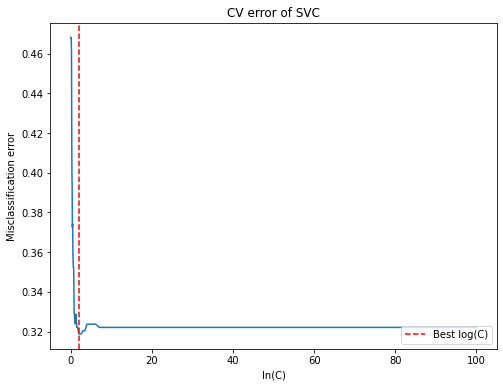

In [0]:
# model: SVM - plot CV scores to determine C
# Cross-Validation Results
a = svm.cv_results_['mean_test_score'].argmax()

plt.figure().set_size_inches(8, 6)
plt.plot(np.logspace(-4, 2, 100),1-svm.cv_results_['mean_test_score'][range(0,100)]);
plt.axvline(np.logspace(-4, 2, 100)[a], linestyle='--', color='red', label='Best log(C)')
plt.ylabel('Misclassification error')
plt.xlabel('ln(C)')
plt.title('CV error of SVC')
plt.legend(loc='lower right')
plt.show()

In [0]:
# model: L1-logistic regression
logit = LogisticRegression(penalty='l1', solver='liblinear', intercept_scaling=100000, random_state=0)
logistic = GridSearchCV(logit, tuned_parameters, cv=n_folds, scoring='accuracy')
logistic.fit = logistic.fit(X_std, y_train)

# plot the CV results to make sure we found a good value for C

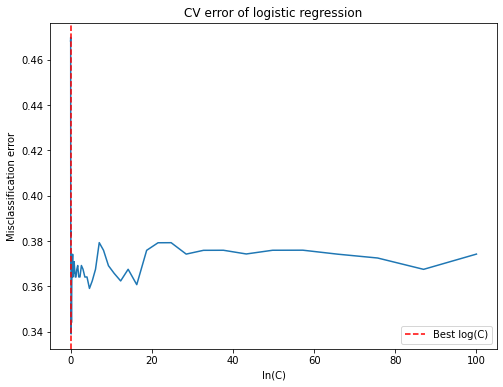

In [0]:
# model: L1-logistic regression
b = logistic.cv_results_['mean_test_score'].argmax()

plt.figure().set_size_inches(8, 6)
plt.plot(np.logspace(-4, 2, 100),1-logistic.cv_results_['mean_test_score'][range(0,100)]);
plt.axvline(np.logspace(-4, 2, 100)[b], linestyle='--', color='red', label='Best log(C)')
plt.ylabel('Misclassification error')
plt.xlabel('ln(C)')
plt.title('CV error of logistic regression')
plt.legend(loc='lower right')
plt.show()

In [0]:
# model: Random forest (# *** Need to tune the # of trees)
# rf = RandomForestClassifier(n_estimators=500, max_depth=10)
# rf.fit = rf.fit(X_std, y_train)

Bs = [1,2,5,10,20,50,100,200,500,1000] # number of trees
Rsqs = []
for B in Bs:
    regressor_a = RandomForestClassifier(n_estimators=B, max_depth=10)
    regressor_a.fit(X_std,y_train)
    Rsqs.append(regressor_a.score(X_std, y_train))

plt.plot(list(map(str,Bs)),Rsqs)
plt.show()

Best_B = Bs[np.argmax(Rsqs)]
Best_B

rf = RandomForestClassifier(n_estimators=Best_B, max_depth=10)
rf.fit = rf.fit(X_std, y_train)

NameError: ignored

In [0]:
# model: LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit=LDA.fit(X_std, y_train)

In [0]:
# model: QDA
QDA = QuadraticDiscriminantAnalysis()
QDA.fit = QDA.fit(X_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [0]:
# model: XGBoost (*** Tuning)
gb = GradientBoostingClassifier(random_state=0) 
gb.fit = gb.fit(X_std,y_train)

Variance Explained,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50
Number of PCs Needed,199,165,136,110,88,69,52,38,26,17


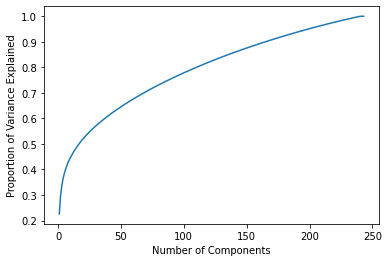

In [0]:
# Generate PCAR
from sklearn.decomposition import PCA
full_pca = PCA(random_state=0).fit(X_train)
full_pca.n_components_

cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)

plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

cutoffs = np.flip(np.arange(0.5, 1, 0.05))
cutoffs_df = pd.DataFrame([[min(np.arange(len(cum_exp_var))[cum_exp_var > c]) + 1 for c in cutoffs]], 
                          columns=cutoffs, index=['Number of PCs Needed'])
cutoffs_df.columns.name = 'Variance Explained'
cutoffs_df


In [0]:
# model: KMeans
final_pca = PCA(165, random_state=0).fit(X_train)
pixels_transform = final_pca.transform(X_train)

kmeans_kpp = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0).fit(pixels_transform)
kmeans_kpp_labels = kmeans_kpp.labels_

In [0]:
# model: EM
em_kmeans = GaussianMixture(n_components=2, init_params='kmeans', n_init=1, random_state=0).fit(pixels_transform)
em_kmeans_labels = em_kmeans.predict(pixels_transform)

In [0]:
# model evaluation and comparison 

In [0]:
all_models = [svm,logit,rf,LDA,QDA,gb,kmeans_kpp,em_kmeans]
mod_names = ["SVM","Logistic","Random Forest","LDA", "QDA","XGBoost","KMeans","Gaussian Mixture"]

In [0]:
Y_train_pred_svm = svm.fit.predict(X_train)
Y_train_pred_logistic = logistic.fit.predict(X_train)
Y_train_pred_rf = rf.fit.predict(X_train)
Y_train_pred_lda = LDA.fit.predict(X_train)
Y_train_pred_qda = QDA.fit.predict(X_train)
Y_train_pred_xgb = gb.fit.predict(X_train)

Y_train_pred_kmean = kmeans_kpp.labels_
Y_train_pred_em = em_kmeans.predict(pixels_transform)

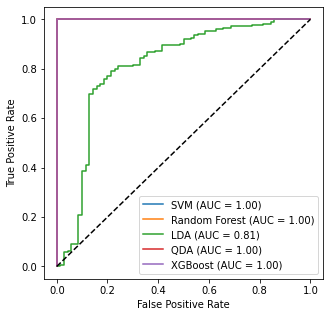

In [0]:
aucs_train = []
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(all_models, mod_names): 
    roc_output = metrics.plot_roc_curve(mod[0], X_train, y_train, 
                                        ax=ax, name=mod[1])
    aucs_train.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

In [0]:
Y_test_pred_svm = svm.fit.predict(X_test)
Y_test_pred_logistic = logistic.fit.predict(X_test)
Y_test_pred_rf = rf.fit.predict(X_test)
Y_test_pred_lda = LDA.fit.predict(X_test)
Y_test_pred_qda = QDA.fit.predict(X_test)
Y_test_pred_xgb = gb.fit.predict(X_test)

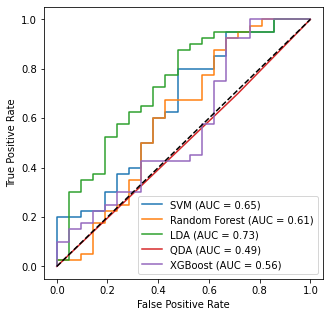

In [0]:
aucs_test = []
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(all_models, mod_names): 
    roc_output = metrics.plot_roc_curve(mod[0], X_test, y_test, 
                                        ax=ax, name=mod[1])
    aucs_test.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

In [0]:
pd.DataFrame(np.vstack([aucs_train, aucs_test]), 
             index=["Training AUC", "Test AUC"], 
             columns=mod_names)